# Poisson GLM

data from Uzzell, V. J., & Chichilnisky, E. J. (2004). Precision of spike trains in primate retinal ganglion cells. Journal of neurophysiology, 92(2), 780-789.
and https://github.com/pillowlab/GLMspiketraintutorial

In [1]:
import numpy as np
import seaborn as sns
sns.set_theme()
from matplotlib.pyplot import *

from scipy.io import loadmat
import pynapple as nap


## Load the data

In [2]:
stim = np.squeeze(loadmat('data_RGCs/Stim.mat')['Stim']) # contains stimulus value at each frame
stim_times = np.squeeze(loadmat('data_RGCs/stimtimes.mat')['stimtimes']) # contains time in seconds at each frame (120 Hz)
all_spike_times = [np.squeeze(x) for x in np.squeeze(loadmat('data_RGCs/SpTimes.mat')['SpTimes'])] # time of spikes for 4 neurons (in units of stim frames)

## Putting the data into pynapple

In [3]:
dt = stim_times[1] - stim_times[0]

main_ep = nap.IntervalSet(start=0, end=(stim.size)*dt)
stimulus = nap.Tsd(t = stim_times, d = stim, time_support = main_ep)
spikes = nap.TsGroup(
    {i:nap.Ts(t = all_spike_times[i]) for i in range(len(all_spike_times))},
    time_support = main_ep,
    num_spikes = np.array([len(spk) for spk in all_spike_times])
    )

print(spikes)

  Index    Freq. (Hz)    num_spikes
-------  ------------  ------------
      0         26.24         31528
      1         17.94         21553
      2         41.58         49954
      3         35.89         43126


## Visualing the raw data for a small epoch

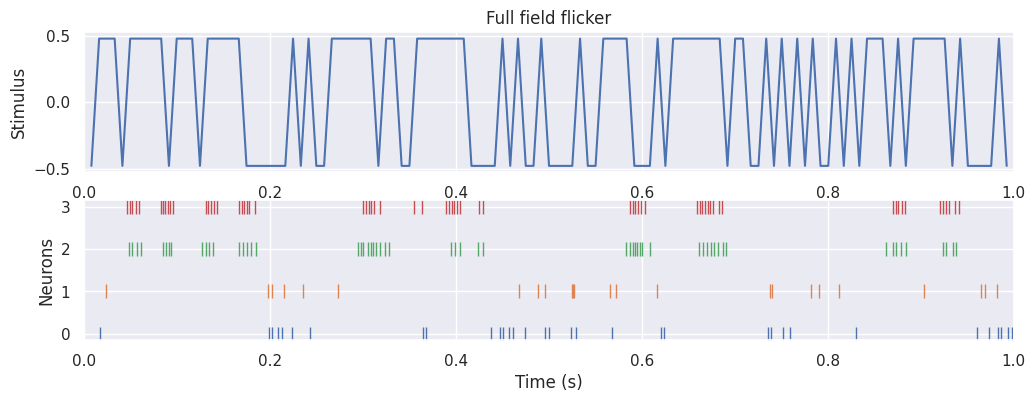

In [4]:
ep = nap.IntervalSet(start = 0, end = 1)


figure(figsize=(12,4))
subplot(211)
plot(stimulus.restrict(ep))
ylabel("Stimulus")
title("Full field flicker")
xlim(ep.values[0])
subplot(212)
for i, n in enumerate(spikes.keys()):
    plot(spikes[n].restrict(ep).fillna(i), '|', markersize=10)
xlabel("Time (s)")
ylabel("Neurons")
xlim(ep.values[0])
show()

## Fitting a Poisson GLM with Pynapple

Fitting Poisson GLM for unit 0
Fitting Poisson GLM for unit 1
Fitting Poisson GLM for unit 2
Fitting Poisson GLM for unit 3


Text(0.5, 1.0, 'Poisson GLM stimulus filter')

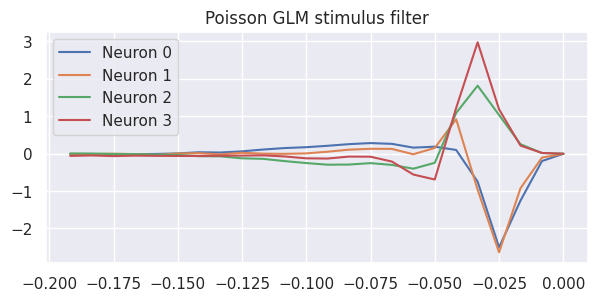

In [5]:
regressors, offset, prediction = nap.compute_1d_poisson_glm(spikes, stimulus, dt, 0.2, ep = main_ep)

figure(figsize = (7,3))
[plot(regressors[n], label = "Neuron %i"%n) for n in spikes.keys()]
legend()
title("Poisson GLM stimulus filter")

## Plotting

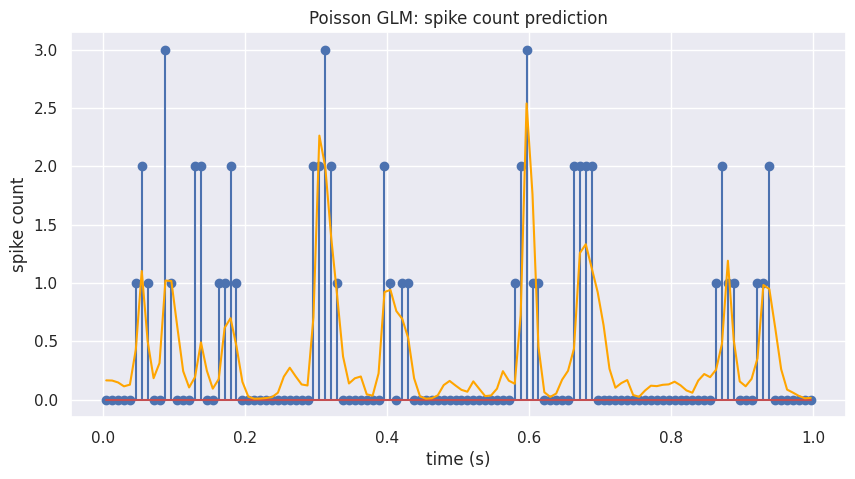

In [8]:
count = spikes.count(dt)

figure(figsize = (10,5))
tmp = count[2].restrict(ep)
stem(tmp.index.values, tmp.values)
plot(prediction[2].restrict(ep), color = 'orange')
title('Poisson GLM: spike count prediction')
ylabel('spike count')
xlabel('time (s)')    
show()
